<a href="https://colab.research.google.com/github/ghodsieh86/ghodsieh6220project/blob/main/parkinson_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#install pycaret


In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 11.5 MB/s eta 0:00:00


In [2]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
from google.colab import files
plt.rcParams['figure.figsize'] = (7,5)
import gdown

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [5]:
#read csv file into dataframe
df = pd.read_csv('/content/drive/MyDrive/dataset/parkinson-disease.csv')
df.head(10)

,Flo(Hz),Jitter(%),Jitter(Abs),RAP,PPQ,Jitter:DDP,MDVP:Shimmer,status
0,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,1
1,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,1
2,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,1
3,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,1
4,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,1
5,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,1
6,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,1
7,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,1
8,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,1
9,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Flo(Hz)       195 non-null    float64
 1   Jitter(%)     195 non-null    float64
 2   Jitter(Abs)   195 non-null    float64
 3   RAP           195 non-null    float64
 4   PPQ           195 non-null    float64
 5   Jitter:DDP    195 non-null    float64
 6   MDVP:Shimmer  195 non-null    float64
 7   status        195 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.3 KB


In [7]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


Explaratory data analysis

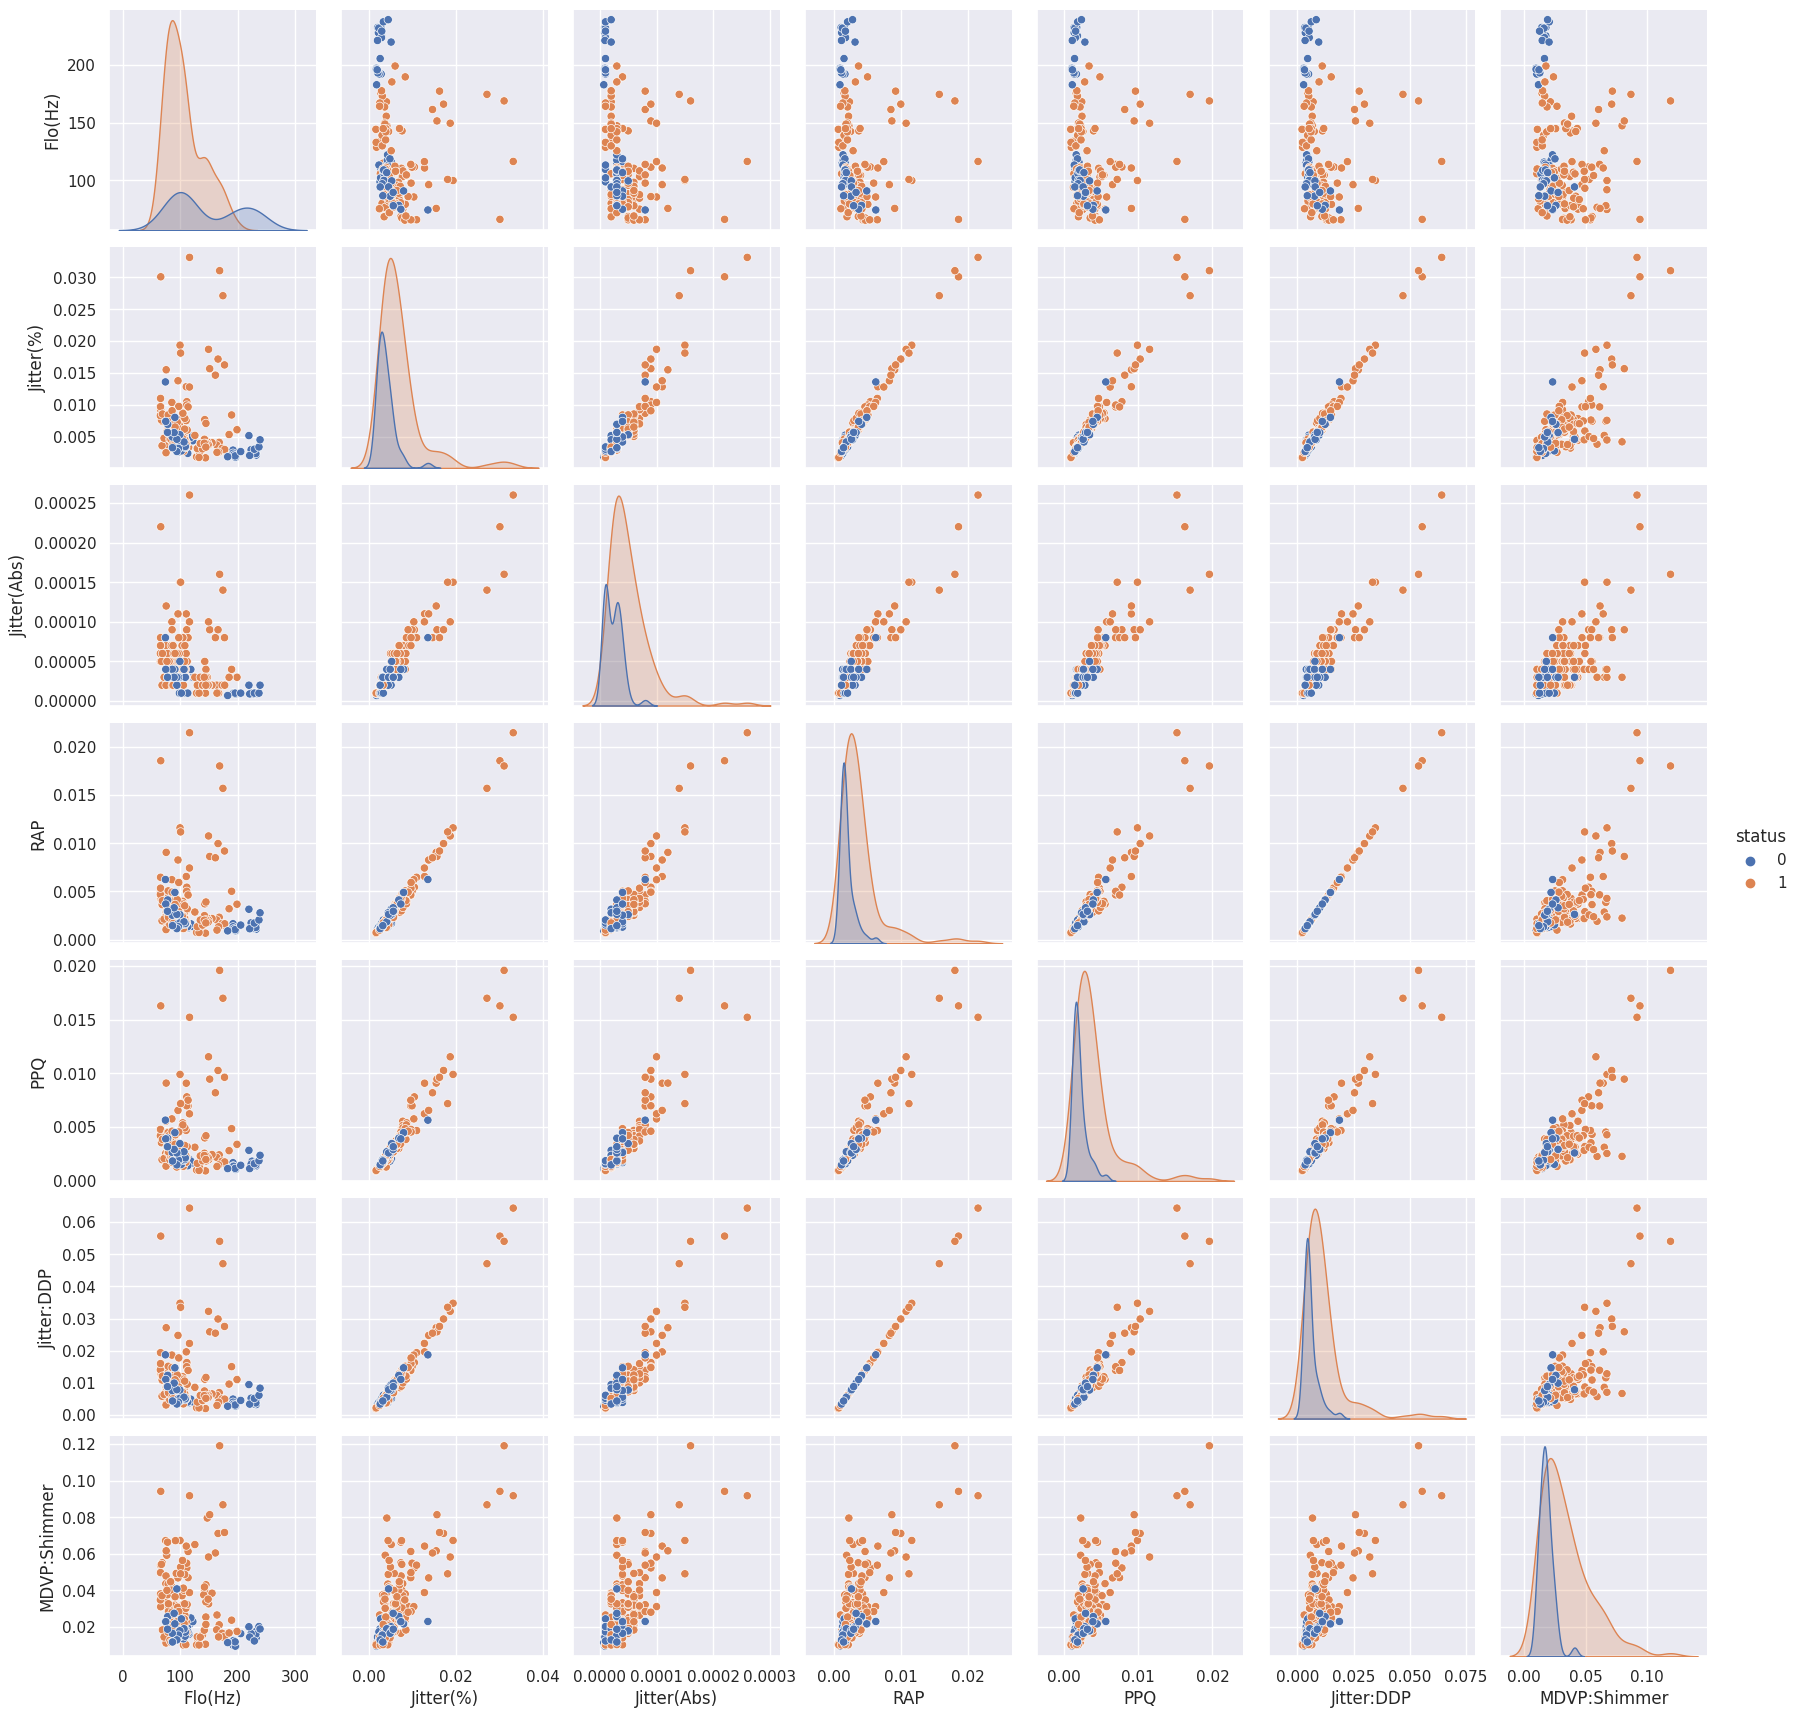

In [8]:
sns.pairplot(df,hue="status")
plt.show()

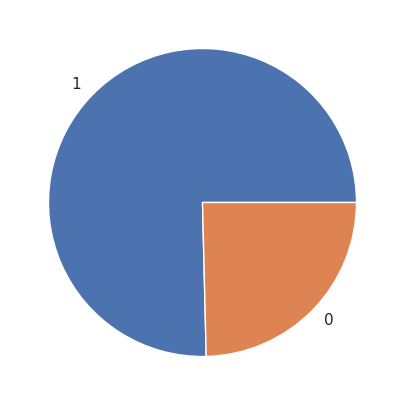

In [9]:
y=df['status']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()


data matrix

In [10]:
X = df.drop(columns=['status'])
X.head(10)

,Flo(Hz),Jitter(%),Jitter(Abs),RAP,PPQ,Jitter:DDP,MDVP:Shimmer
0,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374
1,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134
2,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233
3,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492
4,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425
5,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701
6,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608
7,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567
8,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093
9,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838


In [11]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.31500,140.018500,239.17000
Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.00494,0.007365,0.03316
Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.00003,0.000060,0.00026
RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.00250,0.003835,0.02144
PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.00269,0.003955,0.01958
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.00749,0.011505,0.06433
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.02297,0.037885,0.11908


Data standardization

In [12]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Flo(Hz),Jitter(%),Jitter(Abs),RAP,PPQ,Jitter:DDP,MDVP:Shimmer
0,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985
1,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731
2,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693
3,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396
4,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448
5,-0.058458,0.715418,1.037674,0.447135,1.473037,0.445927,0.919842
6,-0.034661,-0.597735,-0.401899,-0.593351,-0.518319,-0.592304,-0.724625
7,-0.276658,-0.686658,-0.401899,-0.630511,-0.590996,-0.631716,-0.746424
8,-0.566017,-0.146921,0.461845,-0.127159,-0.045917,-0.126113,-0.466763
9,-0.578181,-0.186212,0.461845,-0.211614,-0.045917,-0.212820,-0.070666


obsevation and variables

In [13]:
observations = list(df.index)
variables = list(df.columns)

box and whisker plots

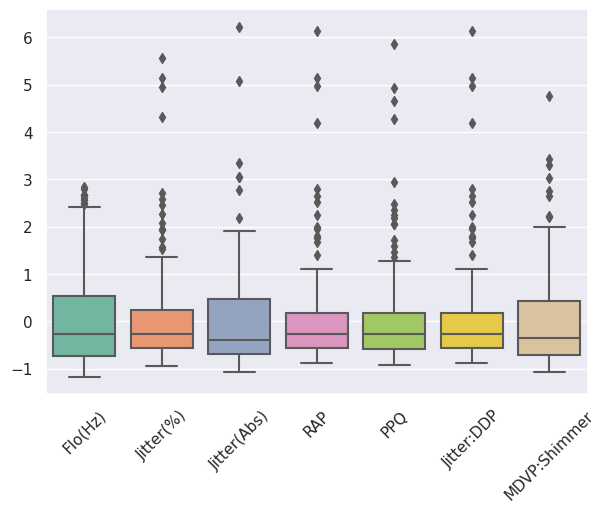

In [14]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

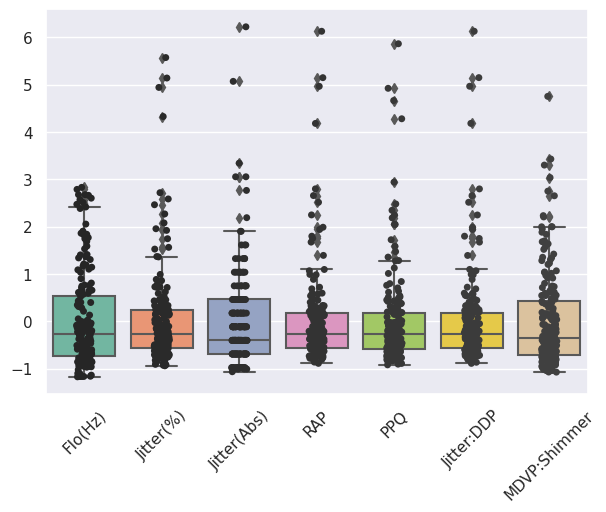

In [15]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

correlation matrix

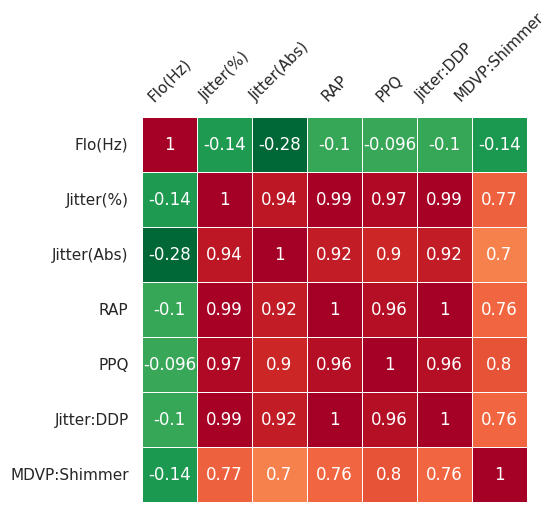

In [16]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

PCA

Text(0, 0.5, '$Z_2$')

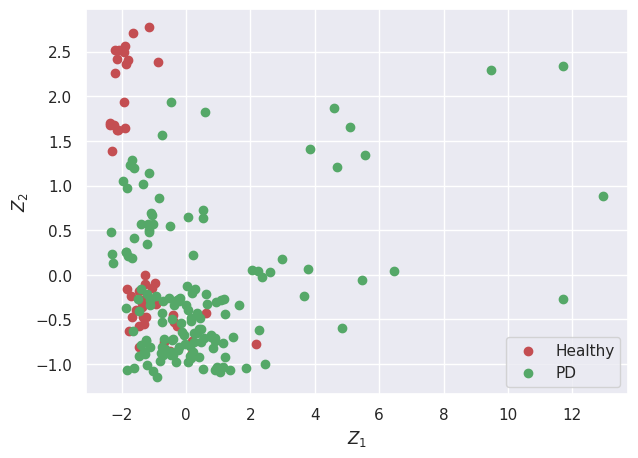

In [17]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Healthy)->0,  2(PD)->1, 
idx_Healthy = np.where(y == 0)
idx_PD = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_Healthy,0], Z[idx_Healthy,1], c='r', label='Healthy')
plt.scatter(Z[idx_PD,0], Z[idx_PD,1], c='g', label='PD')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

eigenvectors

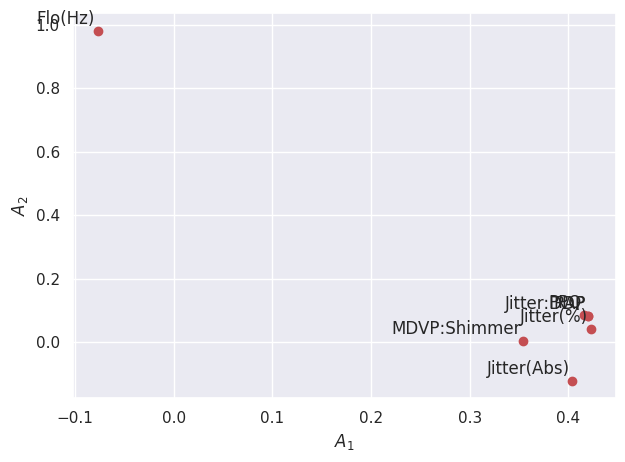

In [18]:
A = pca.components_.T 
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

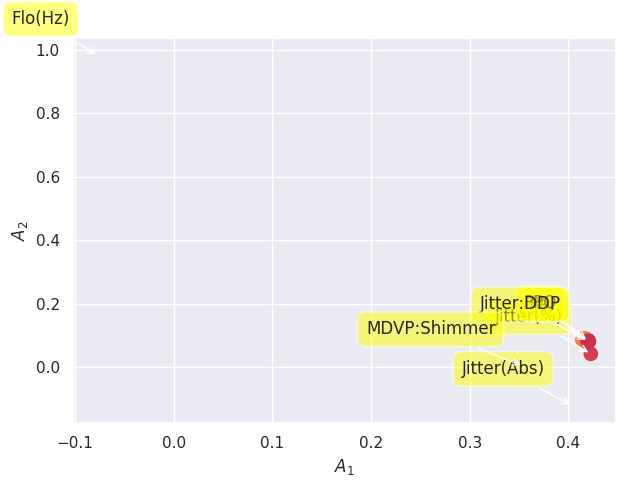

In [19]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))

plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree plot


Text(0, 0.5, 'Explained variance')

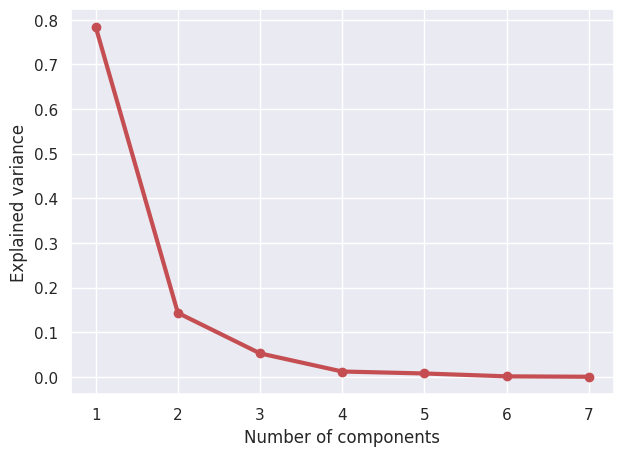

In [20]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

explained variance


Text(0, 0.5, 'Cumulative explained variance')

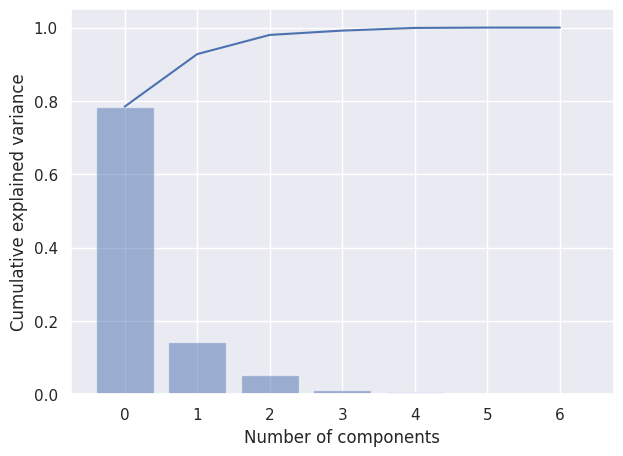

In [21]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

biplot

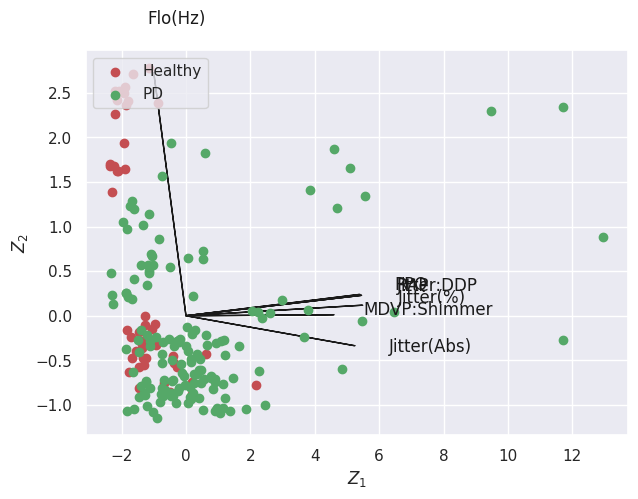

In [22]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Healthy,0], Z[idx_Healthy,1], c='r', label='Healthy')
plt.scatter(Z[idx_PD,0], Z[idx_PD,1], c='g', label='PD')
plt.legend(loc='upper left')

In [23]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Principal components

In [25]:
out['PC']

,PC1,PC2,PC3
0,1.210384,-0.919886,0.374321
1,2.234514,0.040189,0.978566
2,2.610717,0.030316,0.338137
3,2.367772,-0.027632,0.534368
4,3.781406,0.065245,0.553460
...,...,...,...
190,-0.376667,-0.526463,0.788859
191,-0.285019,-0.579785,0.023005
192,2.179757,-0.779644,-1.191831
193,0.183517,-0.877427,-0.382651


scatter plot

[colourmap]> Warning: Colormap [Set1] can not create [195] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [195] unique colors! Available unique colors: [9].


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.17%] of the variance'}, xlabel='PC1 (78.4% expl.var)', ylabel='PC2 (14.3% expl.var)'>)

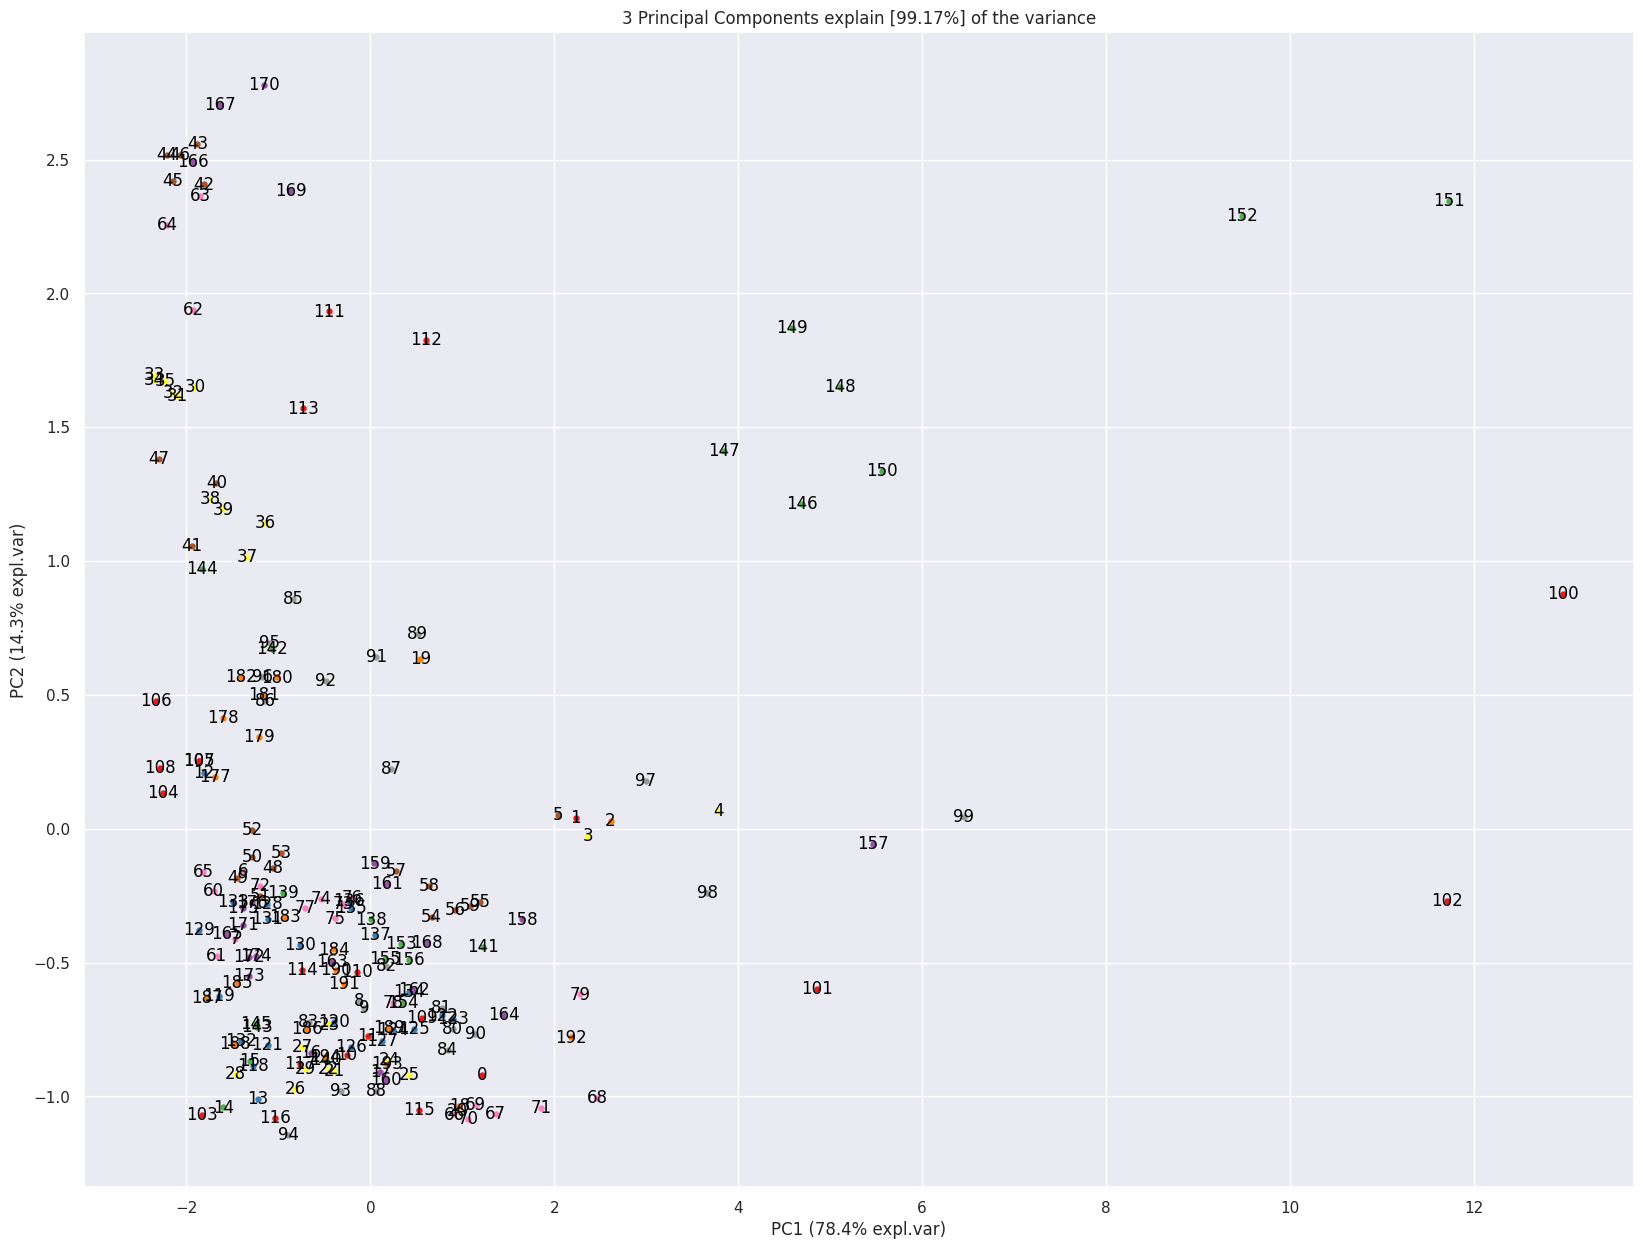

In [26]:
model.scatter(label=True, legend=False)

eigenvectors

In [27]:
A = out['loadings'].T

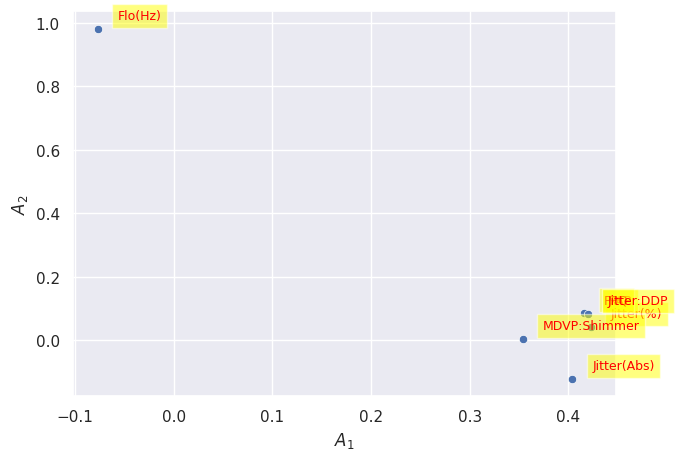

In [28]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.03, s=variables[i],
          fontdict=dict(color='red',size=9),
          bbox=dict(facecolor='yellow',alpha=0.5))

scree plot

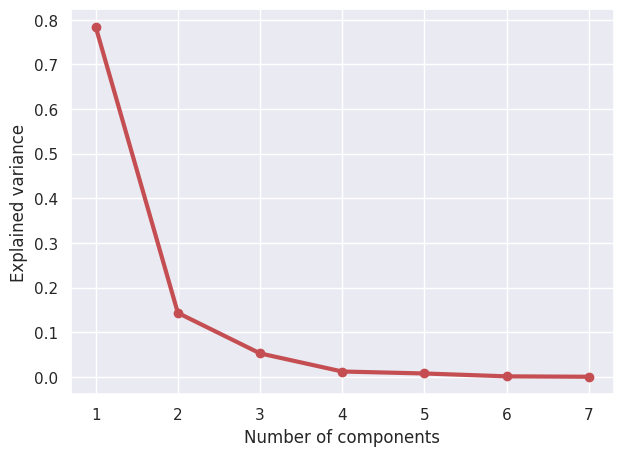

In [29]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

explained variance plot

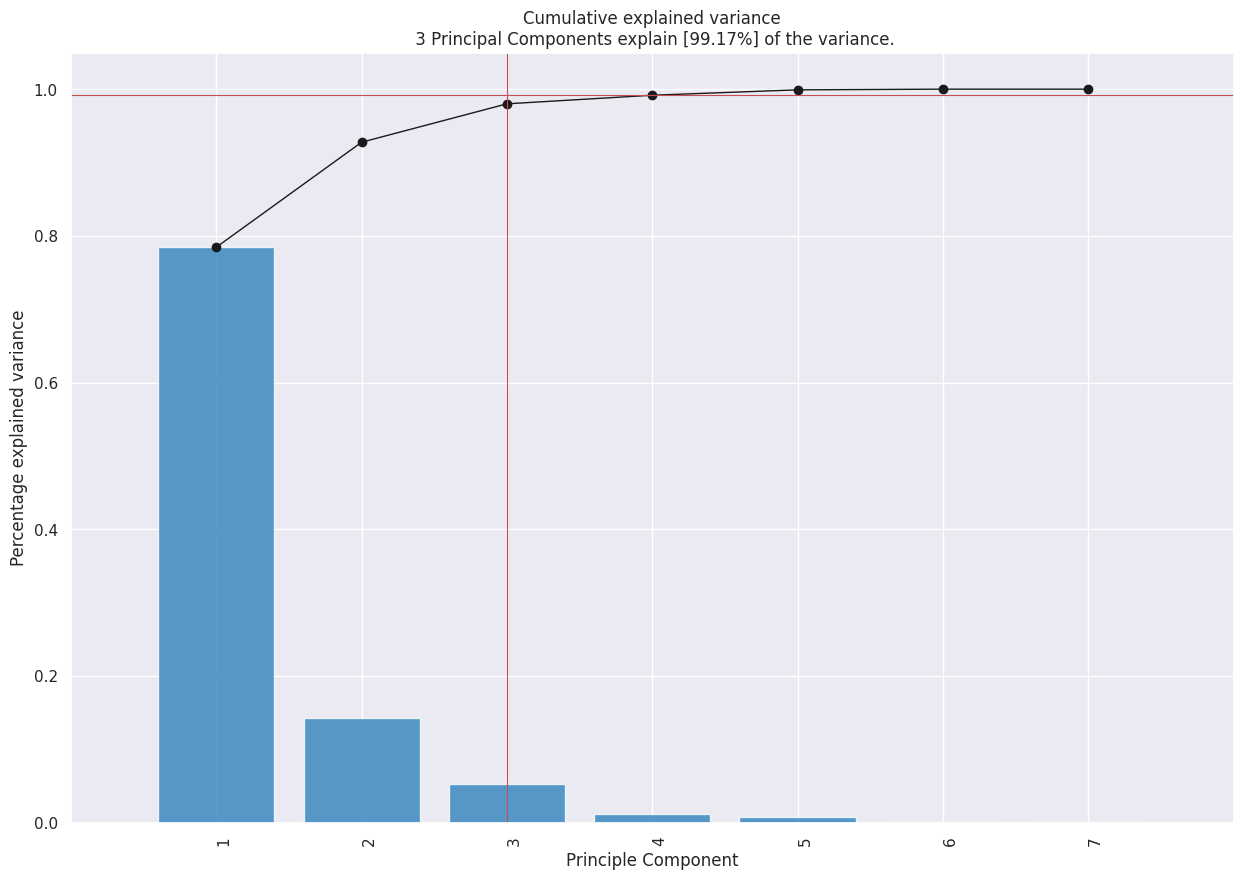

<Figure size 700x500 with 0 Axes>

In [30]:
model.plot();

biplot

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [195] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [195] unique colors! Available unique colors: [9].


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.17%] of the variance'}, xlabel='PC1 (78.4% expl.var)', ylabel='PC2 (14.3% expl.var)'>)

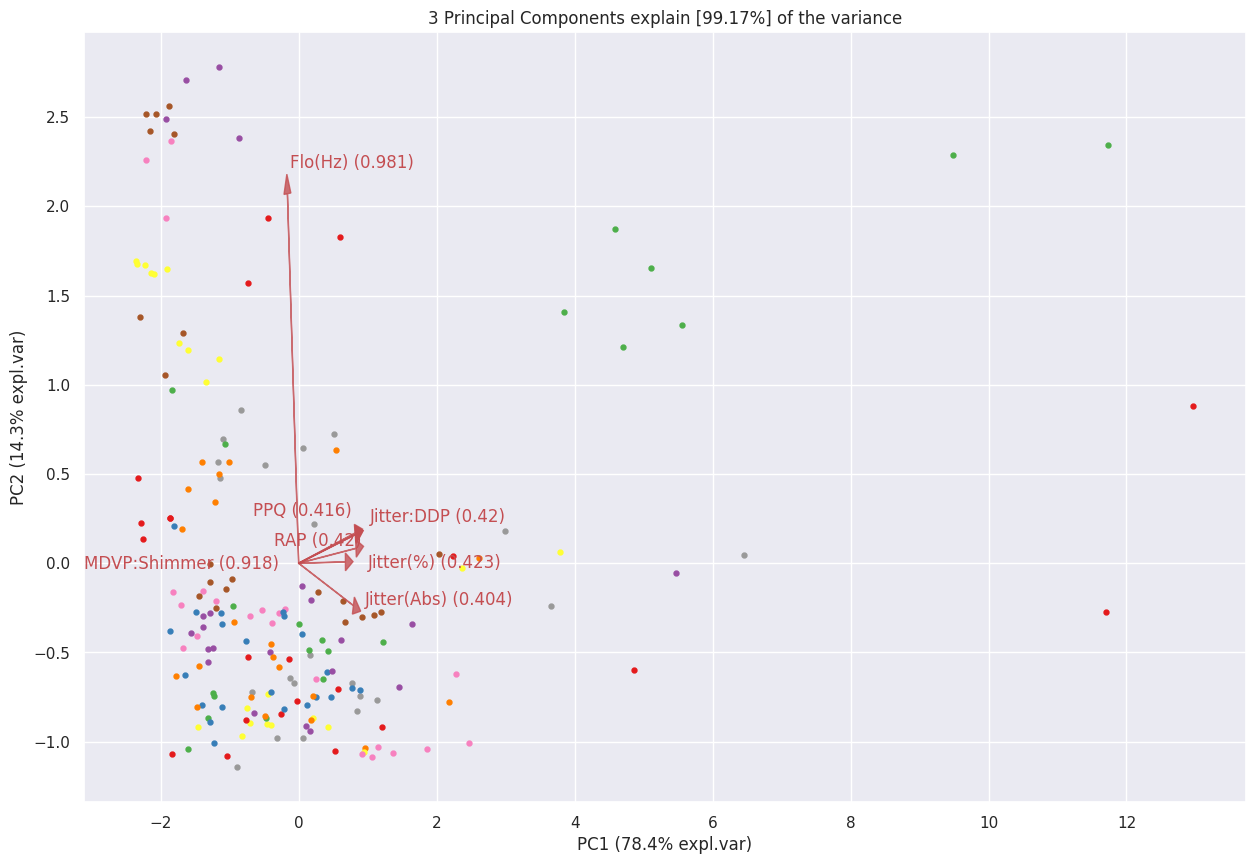

In [31]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [195] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [195] unique colors! Available unique colors: [9].


(<Figure size 1500x1000 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [99.17%] of the variance'}, xlabel='PC1 (78.4% expl.var)', ylabel='PC2 (14.3% expl.var)', zlabel='PC3 (5.23% expl.var)'>)

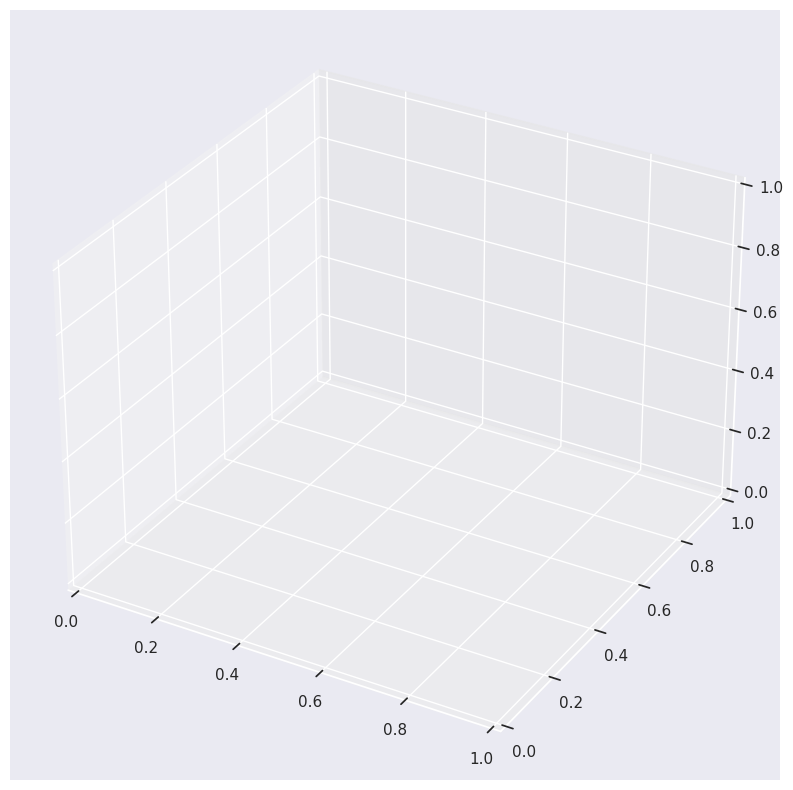

In [32]:
model.biplot3d(label = False, legend=False)

classification


In [33]:
#For Google Colab only
# !pip install scikit-learn==0.23.2
# from pycaret.utils import enable_colab 
# enable_colab()

In [34]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (176, 8)
Unseen Data For Predictions: (19, 8)


setting environment in pycaret

---

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [35]:
from pycaret.classification import *
clf = setup(data=data, target='status', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,status
2,Target type,Binary
3,Original data shape,"(176, 8)"
4,Transformed data shape,"(176, 8)"
5,Transformed train set shape,"(123, 8)"
6,Transformed test set shape,"(53, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [36]:
 #show the best model and their statistics
 best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8865,0.9235,0.9567,0.9014,0.9277,0.6635,0.6748,0.3820
dt,Decision Tree Classifier,0.8699,0.8006,0.9344,0.9031,0.9157,0.6198,0.6402,0.0670
rf,Random Forest Classifier,0.8699,0.8791,0.9456,0.8910,0.9165,0.6174,0.6349,0.5460
lightgbm,Light Gradient Boosting Machine,0.8628,0.8993,0.9256,0.8976,0.9109,0.6121,0.6178,0.1600
xgboost,Extreme Gradient Boosting,0.8615,0.8837,0.9344,0.8907,0.9105,0.5963,0.6129,0.0810
lr,Logistic Regression,0.8455,0.7381,0.9778,0.8464,0.9062,0.4656,0.5135,0.6710
knn,K Neighbors Classifier,0.8455,0.8319,0.9456,0.8658,0.9020,0.5195,0.5588,0.1650
ridge,Ridge Classifier,0.8455,0.0000,0.9778,0.8464,0.9062,0.4656,0.5135,0.0610
gbc,Gradient Boosting Classifier,0.8449,0.8944,0.9233,0.8843,0.9005,0.5394,0.5590,0.2650
ada,Ada Boost Classifier,0.8372,0.8628,0.9233,0.8755,0.8955,0.5060,0.5382,0.3370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [37]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8462,0.7833,0.9000,0.9000,0.9000,0.5667,0.5667
1,0.8462,0.6667,1.0000,0.8333,0.9091,0.4348,0.5270
2,0.9231,0.8333,1.0000,0.9091,0.9524,0.7547,0.7785
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.7500,0.6111,0.8889,0.8000,0.8421,0.2500,0.2582
5,0.9167,0.8333,1.0000,0.9000,0.9474,0.7500,0.7746
6,0.7500,0.6111,0.8889,0.8000,0.8421,0.2500,0.2582
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8333,0.8889,0.7778,1.0000,0.8750,0.6364,0.6831


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [39]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.7833,0.7000,0.7778,0.7368,0.0299,0.0304
1,0.7692,0.6333,0.9000,0.8182,0.8571,0.2642,0.2725
2,0.8462,0.8167,0.9000,0.9000,0.9000,0.5667,0.5667
3,0.9167,1.0000,0.9000,1.0000,0.9474,0.7500,0.7746
4,0.7500,0.6111,0.8889,0.8000,0.8421,0.2500,0.2582
5,0.9167,0.8148,1.0000,0.9000,0.9474,0.7500,0.7746
6,0.8333,0.5556,1.0000,0.8182,0.9000,0.4286,0.5222
7,0.9167,1.0000,1.0000,0.9000,0.9474,0.7500,0.7746
8,0.8333,0.9259,0.7778,1.0000,0.8750,0.6364,0.6831


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [40]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [41]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

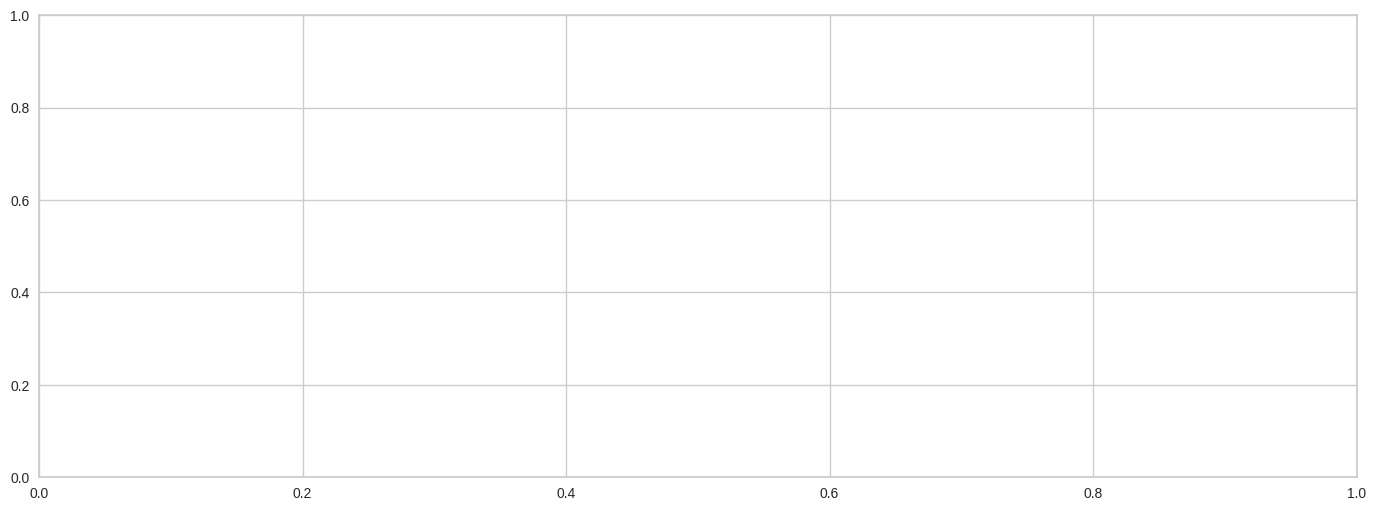

In [43]:
evaluate_model(tuned_dt)

In [44]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8462,0.9667,1.0000,0.8333,0.9091,0.4348,0.5270
1,0.8462,0.8833,1.0000,0.8333,0.9091,0.4348,0.5270
2,0.8462,0.7667,0.9000,0.9000,0.9000,0.5667,0.5667
3,0.9167,0.8500,1.0000,0.9091,0.9524,0.6250,0.6742
4,0.7500,0.7593,0.8889,0.8000,0.8421,0.2500,0.2582
5,0.7500,0.7037,0.7778,0.8750,0.8235,0.4000,0.4082
6,0.8333,0.9630,1.0000,0.8182,0.9000,0.4286,0.5222
7,0.9167,0.9815,1.0000,0.9000,0.9474,0.7500,0.7746
8,0.9167,0.7222,1.0000,0.9000,0.9474,0.7500,0.7746


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [45]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7692,0.6333,1.0000,0.7692,0.8696,0.0000,0.0000
1,0.7692,0.9167,1.0000,0.7692,0.8696,0.0000,0.0000
2,0.9231,0.6833,1.0000,0.9091,0.9524,0.7547,0.7785
3,0.8333,0.9000,1.0000,0.8333,0.9091,0.0000,0.0000
4,0.8333,0.7407,1.0000,0.8182,0.9000,0.4286,0.5222
5,0.8333,0.8148,1.0000,0.8182,0.9000,0.4286,0.5222
6,0.8333,0.8148,1.0000,0.8182,0.9000,0.4286,0.5222
7,0.9167,1.0000,1.0000,0.9000,0.9474,0.7500,0.7746
8,0.8333,0.7222,1.0000,0.8182,0.9000,0.4286,0.5222


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

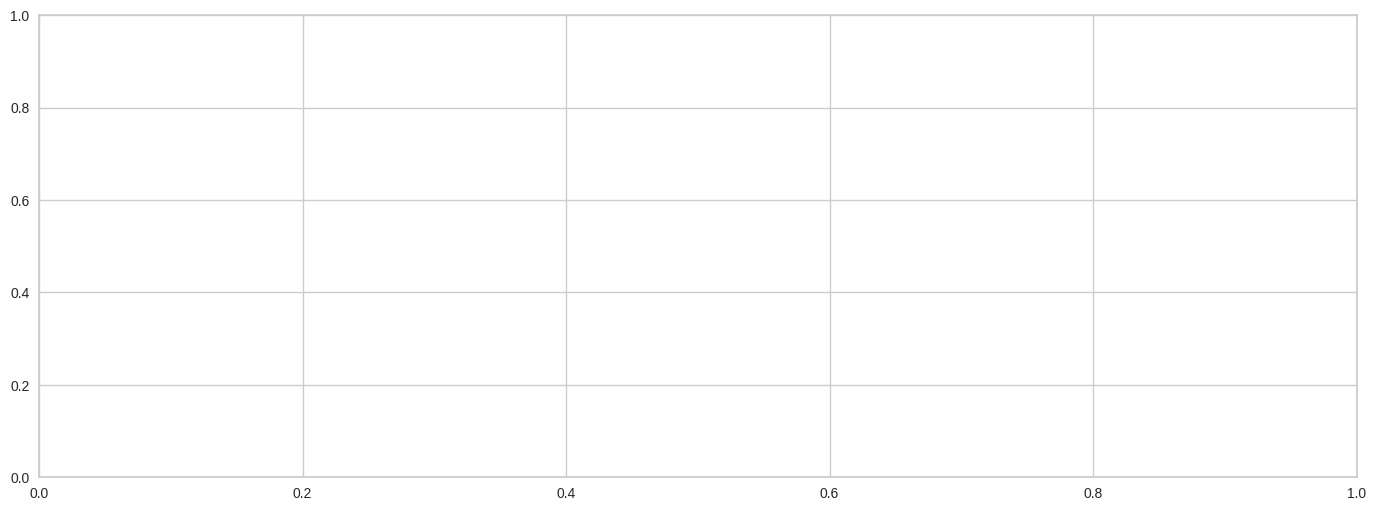

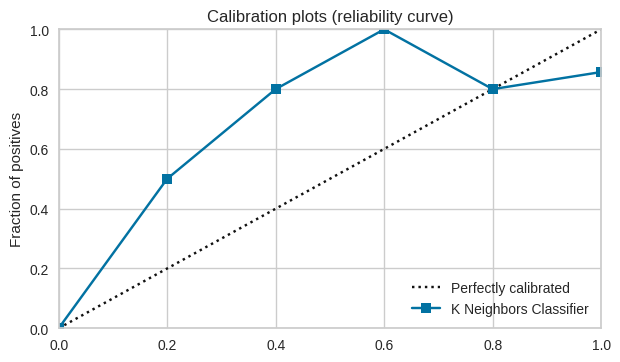

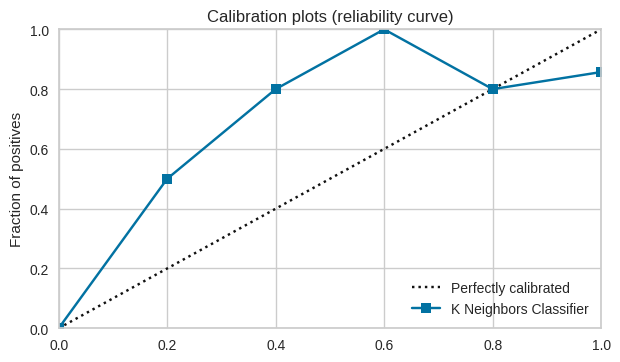

In [46]:
evaluate_model(tuned_knn)